<a href="https://colab.research.google.com/github/Rohit-Singh1/Image-Processing-and-Deep-Learning/blob/main/R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import torch
import torchvision
import numpy as np
import cv2

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',   
    'N/A','N/A','handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 
    'sports ball','kite', 'baseball bat', 'baseball glove', 'skateboard',  
    'surfboard', 'tennis racket','bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl','banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza','donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table','N/A', 'N/A', 'toilet', 'N/A',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone','microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [4]:
def get_prediction(img_path, threshold):
  """
    parameters:
      - img_path - path of the input image
      - threshold - threshold value for prediction score
    method:
      - Image obtained from image path
      - Image converted to image tensor using PyTorch's Transforms
      - Image passed through model to get predictions
      - class, box coordinates are obtained, but only prediction score > threshold
        are chosen.
    
  """
  img = Image.open(img_path)
  transform = transforms.Compose([transforms.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class


In [5]:
# Getting prediction using pretrained Faster-RCNN ResNet-50 model
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  """
  object_detection_api
    parameters:
      - img_path - path of the input image
      - threshold - threshold value for prediction score
      - rect_th - thickness of bounding box
      - text_size - size of the class label text
      - text_th - thickness of the text
    method:
      - prediction is obtained from get_prediction method
      - for each prediction, bounding box is drawn and text is written 
        with opencv
      - the final image is displayed
  """
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()


In [8]:
from google.colab import files as FILE
import os
import requests

img_data = requests.get("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.abcotvs.com%2Fdip%2Fimages%2F1479107_082216-ktrk-car-crowd-img.jpg&f=1&nofb=1").content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

car = requests.get("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F7d%2Fbd%2Fd4%2F7dbdd478ae9e11ac57a62b04ad8e1eb1.jpg&f=1&nofb=1").content
with open('car.jpg','wb') as f:
  f.write(car)


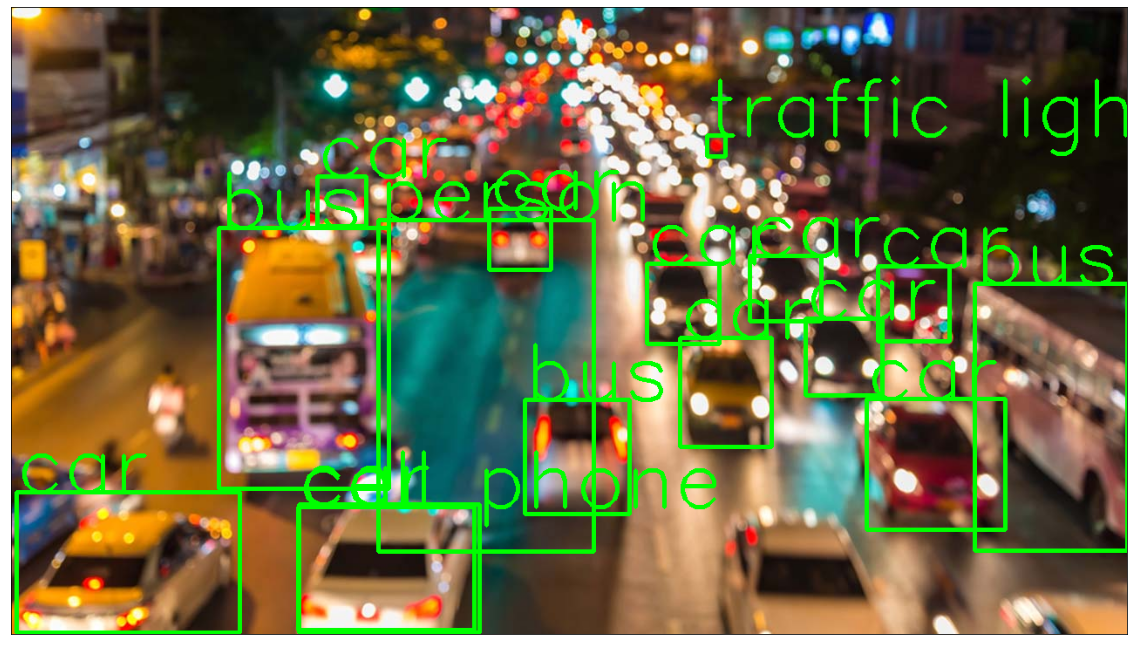

In [12]:
# downloading image for inference

object_detection_api('./image_name.jpg', threshold=0.8)



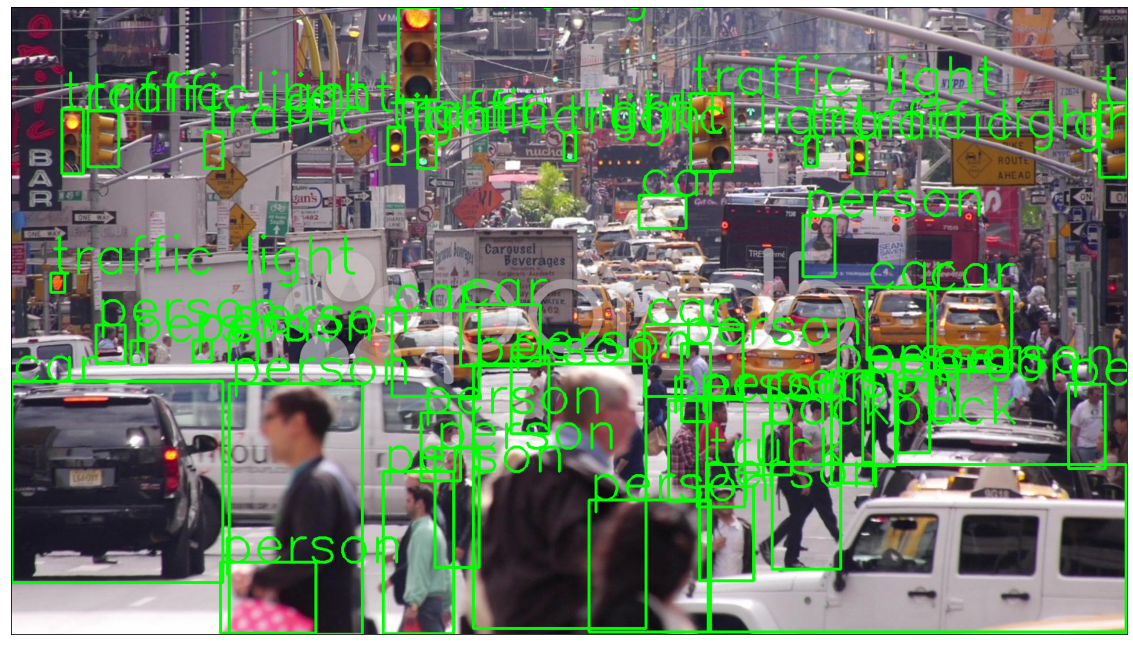

In [11]:
object_detection_api('./car.jpg', threshold=0.8)